## IPL Data Analysis


### By: Uday Kiran Reddy S

### CodeBasics resume challenge

### Datasets From: https://codebasics.io/challenge/codebasics-resume-project-challenge

## Problem Statement:

### "Sports Basics" is a sports blog company that entered space recently. They wanted to get more traffic to their website by releasing a special edition magazine on IPL 2024. This magazine aims to provide interesting insights and facts for fans, analysts and teams based on the last 3 years' data.


In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import re
import warnings
warnings.filterwarnings('ignore')

In [656]:
match_summary = pd.read_csv('/Users/udayreddy/Documents/telangana project files/IPL/datasets/dim_match_summary.csv')


shubhman_2023 = pd.read_csv('/Users/udayreddy/Documents/telangana project files/IPL/Shubman gill.csv')

In [889]:
players = pd.read_csv('/Users/udayreddy/Documents/telangana project files/IPL/datasets/dim_players.csv')

In [739]:
batting_summary = pd.read_csv('/Users/udayreddy/Documents/telangana project files/IPL/datasets/fact_bating_summary.csv')

In [348]:
bowling_summary = pd.read_csv('/Users/udayreddy/Documents/telangana project files/IPL/datasets/fact_bowling_summary.csv')

In [803]:
shami_2023 = pd.read_csv('/Users/udayreddy/Documents/telangana project files/IPL/shami.csv')

## Datasets walkthrough

In [167]:
match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [108]:
players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [9]:
batting_summary.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [10]:
bowling_summary.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


## DATA VALIDATION

In [168]:
match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      206 non-null    object
 1   team2      206 non-null    object
 2   winner     206 non-null    object
 3   margin     206 non-null    object
 4   matchDate  206 non-null    object
 5   match_id   206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB


In [13]:
batting_summary.isna().sum()

match_id       0
match          0
teamInnings    0
battingPos     0
batsmanName    0
out/not_out    0
runs           0
balls          0
4s             0
6s             0
SR             0
dtype: int64

In [14]:
bowling_summary.isna().sum()

match_id       0
match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
dtype: int64

In [15]:
players.isna().sum()

name            0
team            0
battingStyle    0
bowlingStyle    0
playingRole     0
dtype: int64

In [16]:
match_summary.describe()

,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,3.259401,0.024631,27.556650,0.968801,8.750899,7.318144,2.340722,1.174466,0.730706,0.101396
std,1.017162,0.157655,11.204963,1.050985,3.318778,3.764987,1.678368,1.168873,1.035974,0.345077
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,20.000000,0.000000,6.500000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,27.000000,1.000000,8.250000,7.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,0.000000,35.000000,2.000000,10.500000,10.000000,3.000000,2.000000,1.000000,0.000000
max,4.000000,2.000000,69.000000,5.000000,36.000000,19.000000,11.000000,8.000000,7.000000,3.000000


In [17]:
players.describe()

,name,team,battingStyle,bowlingStyle,playingRole
count,292,292,292,292,292
unique,292,10,2,19,9
top,RuturajGaikwad,Mumbai,Right hand Bat,Right arm Offbreak,Bowler
freq,1,39,210,52,117


In [18]:
bowling_summary.describe()

,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,3.259401,0.024631,27.556650,0.968801,8.750899,7.318144,2.340722,1.174466,0.730706,0.101396
std,1.017162,0.157655,11.204963,1.050985,3.318778,3.764987,1.678368,1.168873,1.035974,0.345077
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,20.000000,0.000000,6.500000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,27.000000,1.000000,8.250000,7.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,0.000000,35.000000,2.000000,10.500000,10.000000,3.000000,2.000000,1.000000,0.000000
max,4.000000,2.000000,69.000000,5.000000,36.000000,19.000000,11.000000,8.000000,7.000000,3.000000


In [19]:
batting_summary.describe()

,battingPos,runs,balls,4s,6s
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,4.772032,19.820073,14.700734,1.744798,0.875459
std,2.714852,21.885699,13.516978,2.329142,1.426316
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,4.000000,0.000000,0.000000
50%,4.000000,12.000000,10.000000,1.000000,0.000000
75%,7.000000,29.000000,21.000000,3.000000,1.000000
max,11.000000,140.000000,70.000000,16.000000,10.000000


#### Convert strike rate column into Float

In [839]:
def sr_change(row):
    if row == '-':
        return 0
    else:
        return row

batting_summary['SR'] = batting_summary['SR'].apply(sr_change)
batting_summary['SR'] = batting_summary['SR'].astype(float)
batting_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_id     3268 non-null   object 
 1   batsmanName  3268 non-null   object 
 2   match        3268 non-null   object 
 3   battingPos   3268 non-null   int64  
 4   out/not_out  3268 non-null   object 
 5   runs         3268 non-null   int64  
 6   balls        3268 non-null   int64  
 7   4s           3268 non-null   int64  
 8   6s           3268 non-null   int64  
 9   SR           3268 non-null   float64
 10  matchYear    3268 non-null   int32  
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 268.2+ KB


## DATA CLEANING

#### If we observe, the first name and last name of the player are not separated. Lets seprate the names of players with a space

In [240]:
def name_space(row):
        return re.sub(r'([A-Z])', r' \1',row).strip()

players['name'] = players['name'].apply(name_space)
players  .head()

,name,team,battingStyle,bowlingStyle,playingRole
0,Ruturaj Gaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,Fafdu Plessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,Robin Uthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,Moeen Ali,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,Shubman Gill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


### repeat the above step for batting summary and bowling summary

In [832]:
batting_summary['batsmanName'] = batting_summary['batsmanName'].apply(name_space)
batting_summary.head()

,match_id,batsmanName,match,battingPos,out/not_out,runs,balls,4s,6s,SR,matchYear
0,T203817,Ruturaj Gaikwad,Super Kings Vs KKR,1,out,32,27,3,1,118.51,2021
1,T203817,Fafdu Plessis,Super Kings Vs KKR,2,out,86,59,7,3,145.76,2021
2,T203817,Robin Uthappa,Super Kings Vs KKR,3,out,31,15,0,3,206.66,2021
3,T203817,Moeen Ali,Super Kings Vs KKR,4,not_out,37,20,2,3,185.00,2021
4,T203817,Shubman Gill,Super Kings Vs KKR,1,out,51,43,6,0,118.60,2021


In [750]:
bowling_summary['bowlerName'] = bowling_summary['bowlerName'].apply(name_space)
bowling_summary.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,matchYear
0,T203817,Super Kings Vs KKR,KKR,Shakib Al Hasan,3.0,0,33,0,11.0,6,2,3,0,0,2021
1,T203817,Super Kings Vs KKR,KKR,Shivam Mavi,4.0,0,32,1,8.0,8,1,2,0,0,2021
2,T203817,Super Kings Vs KKR,KKR,Lockie Ferguson,4.0,0,56,0,14.0,4,7,2,2,0,2021
3,T203817,Super Kings Vs KKR,KKR,Varun Chakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,2021
4,T203817,Super Kings Vs KKR,KKR,Sunil Narine,4.0,0,26,2,6.5,6,0,1,1,0,2021


## QUESTIONS;

## 1.Top 10 batsmen based on past 3 years total runs scored.


In [243]:
def outs (row):
    if row == 'out':
        return 1
    else:
        return 0
batting_summary['outs'] = batting_summary['out/not_out'].apply(outs)

player_runs = batting_summary.groupby('batsmanName').agg({'runs':'sum','balls':'sum','4s':'sum','6s':'sum','outs':'sum'}).sort_values(by = 'runs', ascending = 
                                                                                     False).reset_index()
player_runs[['batsmanName','runs']].head(10)

,batsmanName,runs
0,Shubman Gill,1851
1,Fafdu Plessis,1831
2,Ruturaj Gaikwad,1593
3,K L Rahul,1516
4,Jos Buttler,1509
5,Shikhar Dhawan,1392
6,Virat Kohli,1385
7,Sanju Samson,1304
8,Suryakumar Yadav,1225
9,Glenn Maxwell,1214


In [244]:
players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,Ruturaj Gaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,Fafdu Plessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,Robin Uthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,Moeen Ali,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,Shubman Gill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [245]:
player_runs.head()

,batsmanName,runs,balls,4s,6s,outs
0,Shubman Gill,1851,1331,186,56,46
1,Fafdu Plessis,1831,1300,169,72,42
2,Ruturaj Gaikwad,1593,1157,143,67,42
3,K L Rahul,1516,1148,121,64,30
4,Jos Buttler,1509,1027,152,72,36


## ### 2.	Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)

In [206]:
match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [207]:
batting_summary.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,Ruturaj Gaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,Fafdu Plessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,Robin Uthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,Moeen Ali,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,Shubman Gill,out,51,43,6,0,118.60,1


### Converting matchDate into datetime format

In [730]:
match_summary['matchDate'][match_summary['matchDate'] == 'May 28-29, 2023'] = 'May 28, 2023'

In [731]:
match_summary['matchDate'] = pd.to_datetime(match_summary['matchDate'])
match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   team1      206 non-null    object        
 1   team2      206 non-null    object        
 2   winner     206 non-null    object        
 3   margin     206 non-null    object        
 4   matchDate  206 non-null    datetime64[ns]
 5   match_id   206 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.8+ KB


In [250]:
match_summary['matchYear'] = match_summary['matchDate'].dt.year
match_summary.head()

,team1,team2,winner,margin,matchDate,match_id,matchYear
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,2021
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,2021
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,2021
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,2021


### adding matchYear into batting_Summary

In [740]:
#batting_summary = pd.merge(batting_summary,match_summary, on = 'match_id')
batting_summary['matchYear'] = batting_summary['matchDate'].dt.year


In [741]:
batting_summary = batting_summary[['match_id','batsmanName','match','battingPos','out/not_out','runs','balls',
                                  '4s','6s','SR','matchYear']]
batting_summary.head()

,match_id,batsmanName,match,battingPos,out/not_out,runs,balls,4s,6s,SR,matchYear
0,T203817,RuturajGaikwad,Super Kings Vs KKR,1,out,32,27,3,1,118.51,2021
1,T203817,FafduPlessis,Super Kings Vs KKR,2,out,86,59,7,3,145.76,2021
2,T203817,RobinUthappa,Super Kings Vs KKR,3,out,31,15,0,3,206.66,2021
3,T203817,MoeenAli,Super Kings Vs KKR,4,not_out,37,20,2,3,185.00,2021
4,T203817,ShubmanGill,Super Kings Vs KKR,1,out,51,43,6,0,118.60,2021


In [720]:
batting_summary.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team1,team2,winner,margin,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021"
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021"
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021"
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021"
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021"


In [320]:
batting_summary['outs'] = batting_summary['out/not_out'].apply(outs)
batting_summary.columns.tolist()

['match_id',
 'batsmanName',
 'match',
 'battingPos',
 'out/not_out',
 'runs',
 'balls',
 '4s',
 '6s',
 'SR',
 'matchYear',
 'outs']

In [324]:
year_bat_stats = batting_summary.groupby(['batsmanName','matchYear']).agg({'runs':'sum','balls':'sum','4s':'sum','6s':'sum'
                                                          ,'outs':'sum'}).reset_index()
year_bat_stats = summ_bat.pivot(index = 'batsmanName',columns = 'matchYear',values = ['runs','balls','4s','6s','outs']).reset_index()
year_bat_stats.fillna(0,inplace = True)
year_bat_stats.head()

batsmanName   runs               balls                 4s        \
matchYear                   2021  2022   2023   2021  2022   2023  2021  2022   
0          A Bde Villiers  313.0   0.0    0.0  211.0   0.0    0.0  23.0   0.0   
1             Aaron Finch    0.0  86.0    0.0    0.0  61.0    0.0   0.0  10.0   
2            Abdul Basith    0.0   0.0    1.0    0.0   0.0    1.0   0.0   0.0   
3             Abdul Samad  111.0   4.0  169.0   87.0   7.0  128.0   4.0   0.0   
4          Abhijeet Tomar    0.0   4.0    0.0    0.0   8.0    0.0   0.0   1.0   

                   6s             outs            
matchYear  2023  2021 2022  2023  2021 2022 2023  
0           0.0  16.0  0.0   0.0  10.0  0.0  0.0  
1           0.0   0.0  3.0   0.0   0.0  5.0  0.0  
2           0.0   0.0  0.0   0.0   0.0  0.0  0.0  
3          10.0   8.0  0.0  11.0   9.0  2.0  4.0  
4           0.0   0.0  0.0   0.0   0.0  1.0  0.0

### 2. Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)

In [327]:
high_average = year_bat_stats
high_average = high_average[(high_average[('balls',2021)] > 60) & (high_average[('balls',2022)] > 60)
                            &(high_average[('balls',2023)] > 60)]

high_average['bat_average'] = (high_average[('runs',2021)]+high_average[('runs',
                                                                     2022)]+high_average[('runs',2023)]
                          )/(high_average[('outs',2021)]+high_average[('outs',2022)]+high_average[('outs',2023)])

high_average['strike_rate'] = ((high_average[('runs',2021)]+high_average[('runs',
                                                                     2022)]+high_average[('runs',2023)]
                          )/(high_average[('balls',2021)]+high_average[('balls',
                                                                     2022)]+high_average[('balls',2023)]
                          ))*100

top_10 = high_average.sort_values(by='bat_average',ascending = False)
top_10[['batsmanName','bat_average']].head(10)

,batsmanName,bat_average
matchYear,,
97,K L Rahul,50.533333
66,Fafdu Plessis,43.595238
47,David Miller,43.200000
95,Jos Buttler,41.916667
217,Shimron Hetmyer,40.666667
222,Shubman Gill,40.239130
216,Shikhar Dhawan,39.771429
197,Ruturaj Gaikwad,37.928571
48,David Warner,37.900000


In [294]:
#pd.merge(players,high_average,left_on = 'name',right_on = ('batsmanName',''))
#high_average.reset_index()
batting_averages = high_average[['batsmanName','bat_average']].reset_index(drop = True)
batting_averages.head()

,batsmanName,bat_average
matchYear,,
0,Abhishek Sharma,24.833333
1,Aiden Markram,32.291667
2,Ambati Rayudu,22.225806
3,Andre Russell,27.592593
4,David Miller,43.200000


## 3.	Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)

In [334]:
top_10_sr = high_average.sort_values(by='strike_rate',ascending = False).reset_index()
top_10_sr = top_10_sr[['batsmanName','strike_rate']].head(10)
top_10_sr = top_10_sr.set_index(pd.Index(range(1, len(top_10_sr) + 1)))
top_10_sr

,batsmanName,strike_rate
matchYear,,
1,Glenn Maxwell,161.436170
2,Suryakumar Yadav,160.550459
3,Andre Russell,159.188034
4,Shimron Hetmyer,157.274401
5,Nicholas Pooran,157.112069
6,Prithvi Shaw,153.195489
7,Dinesh Karthik,152.643172
8,Yashasvi Jaiswal,152.150538
9,Jos Buttler,146.932814


## 4.	Top 10 bowlers based on past 3 years total wickets taken.!

In [749]:
top_10_bowlers = bowling_summary.groupby('bowlerName').agg({'wickets':sum}).sort_values(by='wickets',ascending = False).reset_index()

top_10_bowlers['bowlerName'] = top_10_bowlers['bowlerName'].apply(name_space)

top_10_bowlers = top_10_bowlers.head(10)
top_10_bowlers

,bowlerName,wickets
0,Mohammed Shami,67
1,Yuzvendra Chahal,66
2,Harshal Patel,65
3,Rashid Khan,63
4,Avesh Khan,47
5,Kagiso Rabada,45
6,Arshdeep Singh,45
7,Varun Chakravarthy,44
8,Shardul Thakur,43
9,Trent Boult,42


## 5.	Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

In [935]:
#bowling_summary = pd.merge(bowling_summary,match_summary, on = 'match_id', how = 'inner')
bowling_summary = bowling_summary[['match_id','match','bowlingTeam','bowlerName','overs','maiden','runs','wickets','economy','0s','4s',
 '6s','wides','noBalls','matchYear']]

bowler_stats = bowling_summary.groupby(['bowlerName','matchYear']).agg({'overs':'sum','maiden':'sum','runs':'sum',
                                                                        'wickets':'sum','0s':'sum','economy':'mean'}).reset_index()
bowler_stats = bowler_stats.pivot(index='bowlerName',columns = 'matchYear',values=['overs','wickets','economy','runs','0s'])
bowler_stats = bowler_stats.fillna(0)


bowler_stats = bowler_stats[(bowler_stats[('overs',2021)]*6 > 60) & (bowler_stats[('overs',2022)]*6 > 60)&
                           (bowler_stats[('overs',2023)]*6 > 60)]

bowler_stats['average'] = (bowler_stats[('runs',2021)] + 
                           bowler_stats[('runs',2022)]+bowler_stats[('runs',2023)])/(bowler_stats[('wickets',2021)] + 
                           bowler_stats[('wickets',2022)]+bowler_stats[('wickets',2023)])

bowler_stats['avg_economy'] = (bowler_stats[('economy',2021)]+bowler_stats[('economy',2022)]+
                               bowler_stats[('economy',2023)])/3

bowler_stats = bowler_stats.sort_values(by = 'average')
bowler_stats[['average']].head(10)

,average
matchYear,
bowlerName,
Andre Russell,18.228571
Yuzvendra Chahal,20.196970
Harshal Patel,20.353846
Rashid Khan,20.904762
Mohammed Shami,20.970149
Avesh Khan,23.723404
Kagiso Rabada,23.755556
Moeen Ali,23.857143


## 6.	Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)

In [937]:
bowler_stats['total_economy_rate'] = (bowler_stats[('economy',2021)] + bowler_stats[('economy',2022)] + 
                                      bowler_stats[('economy',2023)])/3

least_economy = bowler_stats.sort_values(by = 'total_economy_rate')
least_economy[['total_economy_rate']].head(10)

,total_economy_rate
matchYear,
bowlerName,
Sunil Narine,6.724048
Rashid Khan,7.180900
Axar Patel,7.217203
Ravichandran Ashwin,7.605941
Ravi Bishnoi,7.612487
Rahul Chahar,7.683603
Yuzvendra Chahal,7.754127
Ravindra Jadeja,7.814306


## 7.	Top 5 batsmen based on past 3 years boundary % (fours and sixes)

In [413]:
player_runs['boundary_%'] = (((player_runs['4s']*4) + (player_runs['6s']*6))/player_runs['runs'])*100

top_5_boundary_percent = player_runs.sort_values(by='boundary_%',ascending = False)
top_5_boundary_percent = top_5_boundary_percent[top_5_boundary_percent['balls'] > 200]

high_average['boundary_%'] = round((((high_average[('4s',2021)]*4)+
                              (high_average[('6s',2021)]*6)+
                              (high_average[('4s',2022)]*4)+
                              (high_average[('6s',2022)]*6)+
                              (high_average[('4s',2023)]*4)+
                              (high_average[('6s',2023)]*6))/(high_average[('runs',2021)]+
                              high_average[('runs',2022)]+
                              high_average[('runs',2023)]))*100,2)
                                                              
top_5_boundary_percent = high_average[['batsmanName','boundary_%']].sort_values(by = 'boundary_%',ascending = False)
top_5_boundary_percent.head().reset_index(drop = True)

,batsmanName,boundary_%
matchYear,,
0,Andre Russell,75.70
1,Yashasvi Jaiswal,74.56
2,Prithvi Shaw,70.67
3,Jos Buttler,68.92
4,Glenn Maxwell,68.70


## 8.	Top 5 bowlers based on past 3 years dot ball %

In [936]:
bowler_stats['dot_percent'] = round(((bowler_stats[('0s',2021)]+
                              bowler_stats[('0s',2022)]+
                              bowler_stats[('0s',2023)]
                              )/((bowler_stats[('overs',2021)]+
                                bowler_stats[('overs',2022)]+
                                bowler_stats[('overs',2023)])*6))*100,2)

top_5_dot_percent = bowler_stats[['dot_percent']].sort_values(by = 'dot_percent',ascending = False).head()
top_5_dot_percent

,dot_percent
matchYear,
bowlerName,
Mohammed Siraj,47.71
Mohammed Shami,47.65
Trent Boult,46.53
Umran Malik,44.18
Khaleel Ahmed,43.64


## 9.	Top 4 teams based on past 3 years winning %


In [490]:
team_stats = match_summary.groupby('winner').agg({'chasing':'sum','winner':'count'})
team_stats

,chasing,winner
winner,,
Capitals,14,21
KKR,14,21
Mumbai,13,20
Punjab Kings,8,19
RCB,10,25
Royals,9,22
Sunrisers,9,13
Super Giants,4,17
Super Kings,11,25


In [506]:
team_stats['matches_Played'] = (match_summary['team1'].value_counts() + match_summary['team2'].value_counts())

team_stats = team_stats.rename(columns = {'winner':'wins'})

team_stats['win_percent'] = round((team_stats['wins']/team_stats['matches_Played']) * 100,2)

team_stats = team_stats.sort_values(by = 'win_percent', ascending = False)

team_stats.head(6)

,wins,matches_Played,win_percent
winner,,,
Titans,23,33,69.70
Super Giants,17,29,58.62
RCB,25,45,55.56
Super Kings,25,45,55.56
Royals,22,45,48.89
Capitals,21,43,48.84


## NOTE: Titans and Supergiants have played only two seasons of IPL (2022 and 2023)

## 10. Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years.

In [450]:
def chasing(row):
    if 'wickets' in row:
        return 1
    else:
        return 0

chase_wins = match_summary
chase_wins['chasing'] = chase_wins['margin'].apply(chasing)

matches_won_by_chasing = chase_wins.groupby('winner').agg({'chasing':'sum'})
matches_won_by_chasing.sort_values(by = 'chasing',ascending = False).head(2)

,chasing
winner,
Capitals,14
KKR,14


## Predict the following for the season 2024 using available data and by doing additional research!

## 1.	Orange and purple cap player

## SHUBMAN GILL (Orange Cap (most_runs))

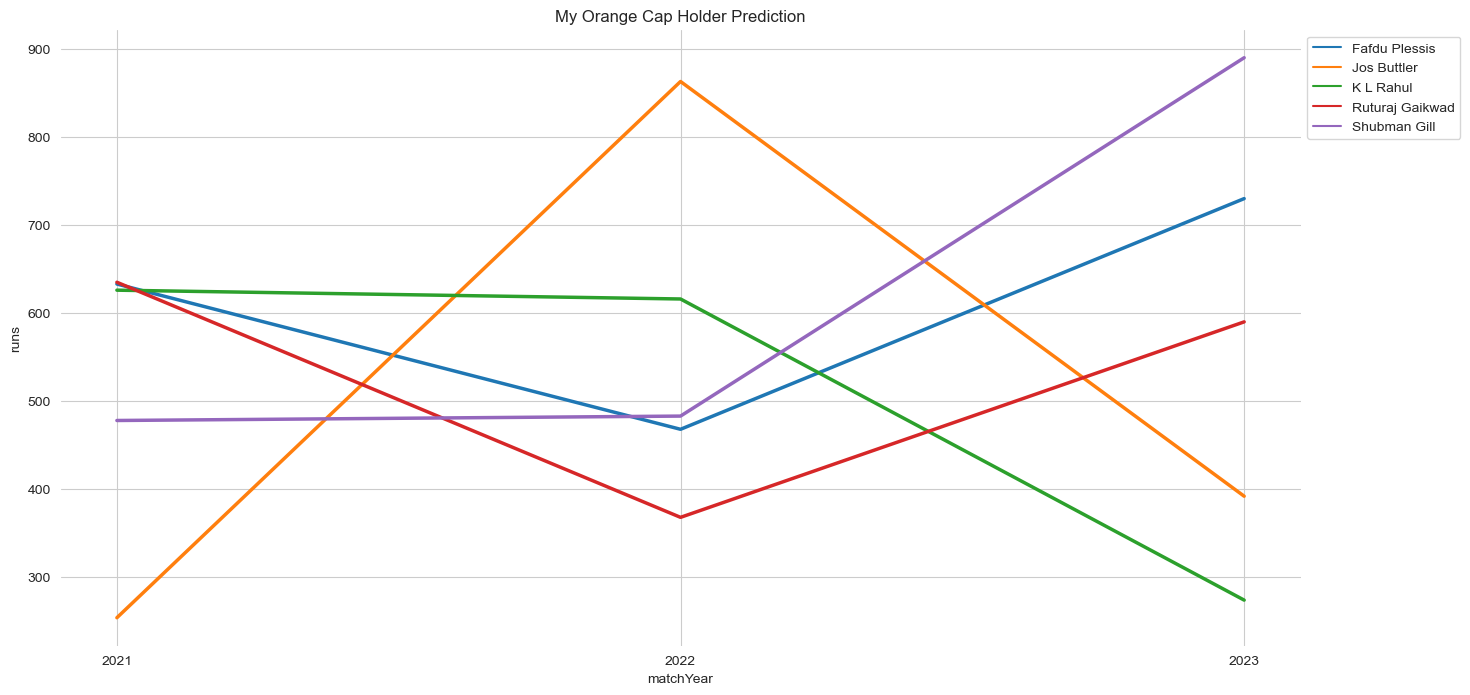

In [653]:
orange_cap = batting_summary[batting_summary['batsmanName'].isin(['Shubman Gill','Ruturaj Gaikwad','Jos Buttler',
                                                           'K L Rahul', 'Fafdu Plessis'])]
orange_cap = orange_cap.groupby(['batsmanName','matchYear']).agg({'runs':'sum'}).reset_index()

plt.figure(figsize = (16,8))
sns.lineplot(x='matchYear',y='runs',data = orange_cap, hue = 'batsmanName',linewidth=2.5)

sns.despine(left=True, bottom=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

plt.xticks([2021,2022,2023])

plt.title('My Orange Cap Holder Prediction')

#plt.annotate('Shubman Gill (890 runs)',xy = (2022,870),fontsize = 'larger')

plt.legend(loc = 'upper left', bbox_to_anchor=(1.0, 1))

plt.show()

## My prediction for orange cap winner is Shubman Gill.

### Reason 1 -> Shubman Gill's consistent performance, reflected in scores of 478, 483, and 890 runs over the last three seasons. With a batting average of 40, Gill's reliability and proficiency stand out.

In [655]:
high_average[high_average['batsmanName'] == 'Shubman Gill']

batsmanName   runs                balls                  4s        \
matchYear                 2021   2022   2023   2021   2022   2023  2021  2022   
222        Shubman Gill  478.0  483.0  890.0  402.0  365.0  564.0  50.0  51.0   

                   6s              outs             bat_average strike_rate  \
matchYear  2023  2021  2022  2023  2021  2022  2023                           
222        85.0  12.0  11.0  33.0  17.0  14.0  15.0    40.23913   139.06837   

          boundary_%  
matchYear             
222            58.35

#### Reason 2 ->In 2023, Shubman Gill emerged as the standout performer in ODIs, accumulating a staggering 1,230 runs in just 20 matches. With an impressive batting average of 72.35 and a strike rate of 105.03, Gill showcased his exceptional skill and consistency at the crease. Notably, five out of his six ODI centuries were achieved in this remarkable year, including a historic double-hundred against New Zealand. Additionally, Gill displayed his versatility by scoring five half-centuries. His exceptional performance established him as the leading run-scorer of the year, reaffirming his status as one of cricket's most promising talents and a force to be reckoned with on the international stage. (Source: NewsBytes)






In [658]:
shubhman_2023

,FORMAT,Innings,Runs,Balls,Outs,Avg,SR,Highs Score,Fifties,Hundreds,fours,sixes
0,ODI,29,"1,584","1,503",25,63.4,105.4,208,9,5,181,41
1,T20I,13,312,215,12,26.0,145.1,126,1,1,26,16


##### SOURCE: http://www.cricmetric.com/playerstats.py?player=Shubman+Gill&role=batsman&format=T20I&groupby=year

### My prediction for Purple cap winner is Rashid Khan.

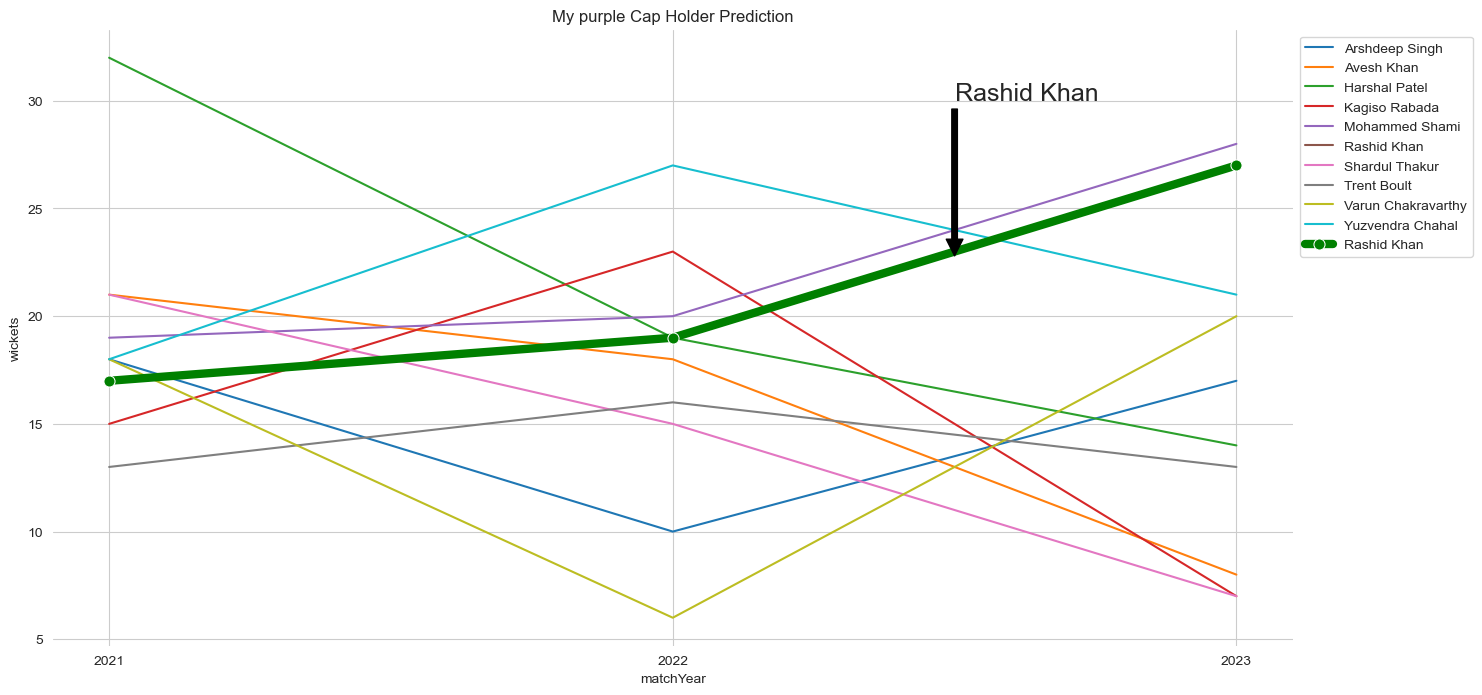

In [942]:
purple_cap = bowling_summary.groupby(['bowlerName','matchYear']).agg({'wickets':'sum'}).reset_index()
purple_cap = purple_cap[purple_cap['bowlerName'].isin(top_10_bowlers['bowlerName'])]

plt.figure(figsize = (16,8))

sns.lineplot(x='matchYear',y='wickets',data=purple_cap, hue = 'bowlerName')

Rashid = purple_cap[purple_cap['bowlerName']=='Rashid Khan']
sns.lineplot(x='matchYear',y='wickets',data=Rashid,linewidth = 6,color='green',  marker='o', markersize=8, label='Rashid Khan')

sns.despine(left=True, bottom=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

plt.xticks([2021,2022,2023])

plt.title('My purple Cap Holder Prediction')

plt.annotate('Rashid Khan',xy =(2022.5,22.8),xytext=(2022.5,30),fontsize = '18',arrowprops=dict(color = 'black'))

plt.legend(loc = 'upper left', bbox_to_anchor=(1.0, 1))


plt.show()

## 2.	Top 4 qualifying teams

In [811]:
team_stats = team_stats.reset_index()
team_stats

,winner,wins,matches_Played,win_percent
0,Titans,23,33,69.70
1,Super Giants,17,29,58.62
2,RCB,25,45,55.56
3,Super Kings,25,45,55.56
4,Royals,22,45,48.89
5,Capitals,21,43,48.84
6,KKR,21,45,46.67
7,Mumbai,20,44,45.45
8,Punjab Kings,19,42,45.24
9,Sunrisers,13,41,31.71


In [814]:
my_teams = ['Super Kings','Sunrisers','RCB','Royals']

my_qual_teams = team_stats[team_stats['winner'].isin(my_teams)]
my_qual_teams

,winner,wins,matches_Played,win_percent
2,RCB,25,45,55.56
3,Super Kings,25,45,55.56
4,Royals,22,45,48.89
9,Sunrisers,13,41,31.71


## Justification

## 1) Super Kings

#### Chennai Super Kings are the kings of IPL, winning it five times. They won in 2023 and will keep playing with almost the same team in 2024. During the auction, they picked up two great players, Daryl Mitchell and Rachin Ravindra from New Zealand, who are in top form. With these additions, CSK looks set to continue their winning streak in the upcoming IPL season.

## 2) RCB

#### Royal Challengers Bangalore (RCB) hasn't won an IPL trophy yet, but they've got a star-studded team. Led by Virat Kohli, known as one of the best batsmen today, RCB also has Faf du Plessis, who's been scoring big runs in the IPL. Glenn Maxwell, a top all-rounder, helped Australia win the 2023 World Cup. Mohammed Siraj, ranked fourth in the world, strengthens their bowling. RCB made smart buys in the auction, getting Alzarri Joseph and Lockie Ferguson to boost their bowling even more. With this talent, RCB hopes to change their luck and lift the IPL trophy this season.

## 3) Royals

#### Despite winning the first IPL season in 2007, the Rajasthan Royals haven't performed consistently since then. But they have a strong team now. Their top order with players like Jos Buttler, Sanju Samson, and Yashaswi Jaiswal looks promising. Plus, they've got Shimron Hetmyer and Rovaman Powell from the West Indies, who can finish the innings with big hits. Yuzvendra Chahal, who takes a lot of wickets, leads their bowling attack. They also have Trent Boult, Ravichandran Ashwin, and Adam Zampa. With a good mix of batting and bowling talent, I think the Royals have a good chance of making it to the top four teams in the upcoming IPL season.

## 4) Sunrisers

#### Sunrisers Hyderabad have had some good moments in recent IPL seasons, making it to the playoffs and even reaching the finals once. But they've also faced some tough times. To improve, they made smart moves during the auction. They picked up players like Travis Head and Pat Cummins, who led Australia to victory in the 2023 World Cup. They also added Aiden Markram and Heinrich Klaasen from South Africa, who've been performing well in different cricket formats. With experienced bowlers like Bhuvneshwar Kumar and T Natarajan on their side, Sunrisers are looking to bounce back stronger in the next IPL season.






## 3.	Winner and runner-up!

In [817]:
win_run = ['Super Kings','Sunrisers']

win_run_team = team_stats[team_stats['winner'].isin(win_run)]

win_run_team['result'] = ['winner','runner']

win_run_team

,winner,wins,matches_Played,win_percent,result
3,Super Kings,25,45,55.56,winner
9,Sunrisers,13,41,31.71,runner


## Pick your team selecting the Best 11 players based on their positions, 3 years performance data and additional research

In [924]:
my_playing_11 = ['Shubman Gill',"Jos Buttler",'Virat Kohli','Ishan Kishan','Glenn Maxwell','Rinku Singh','Ravindra Jadeja',
                'Rashid Khan','Pat Cummins','Jasprit Bumrah','Mohammed Siraj']



In [931]:
players['name'] = players['name'].str.replace(' ','')
players['name']= players['name'].apply(name_space)
my_11 = players[players['name'].isin(my_playing_11)]

my_11['name'] = pd.Categorical(my_11['name'], categories=my_playing_11, ordered=True)
my_11 = my_11.sort_values('name')

my_11 = my_11[['name','playingRole']].reset_index(drop = True)
my_11 = my_11.set_index(pd.Index(range(1, len(my_11) + 1)))

def cwk(row):
    if row == 'Pat Cummins':
        return row + ' (C)'
    elif row == 'Jos Buttler':
        return row+' (WK)'
    else:
        return row


my_11['name'] = my_11['name'].apply(cwk)
my_11

,name,playingRole
1,Shubman Gill,Opening Batter
2,Jos Buttler (WK),Wicketkeeper Batter
3,Virat Kohli,Top order Batter
4,Ishan Kishan,Wicketkeeper Batter
5,Glenn Maxwell,Batting Allrounder
6,Rinku Singh,Middle order Batter
7,Ravindra Jadeja,Allrounder
8,Rashid Khan,Bowling Allrounder
9,Pat Cummins (C),Bowler
10,Jasprit Bumrah,Bowler


## 5. Pick your top 3 all-rounders!

In [933]:
my_top3_ar = ['Ravindra Jadeja','Andre Russell','Marcus Stoinis']

ar_top3 = players[players['name'].isin(my_top3_ar)]
ar_top3

,name,team,battingStyle,bowlingStyle,playingRole
19,Ravindra Jadeja,Super Kings,Left hand Bat,Slow Left arm Orthodox,Allrounder
22,Marcus Stoinis,Capitals,Right hand Bat,Right arm Medium,Batting Allrounder
122,Andre Russell,KKR,Right hand Bat,Right arm Fast,Allrounder


## Exporting cleaned Datasets

In [945]:
file_path = '/Users/udayreddy/Documents/telangana project files/IPL/datasets/fin_batting_summary.csv'


batting_summary.to_csv(file_path, index=False)

In [946]:
file_path = '/Users/udayreddy/Documents/telangana project files/IPL/datasets/fin_bowling_summary.csv'


bowling_summary.to_csv(file_path, index=False)

In [947]:
file_path = '/Users/udayreddy/Documents/telangana project files/IPL/datasets/fin_match_summary.csv'

match_summary.to_csv(file_path, index=False)

In [948]:
file_path = '/Users/udayreddy/Documents/telangana project files/IPL/datasets/fin_players.csv'

players.to_csv(file_path, index=False)